In [1]:
import pandas as pd
from pprint import pprint as pp
import matplotlib.pyplot as plt
import math as m

In [2]:
raw_data = pd.read_csv("data/California_Fire_Incidents.csv")
raw_data.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [3]:
# Output names of all columns
for name in raw_data.columns:
    print(name);

AcresBurned
Active
AdminUnit
AirTankers
ArchiveYear
CalFireIncident
CanonicalUrl
ConditionStatement
ControlStatement
Counties
CountyIds
CrewsInvolved
Dozers
Engines
Extinguished
Fatalities
Featured
Final
FuelType
Helicopters
Injuries
Latitude
Location
Longitude
MajorIncident
Name
PercentContained
PersonnelInvolved
Public
SearchDescription
SearchKeywords
Started
Status
StructuresDamaged
StructuresDestroyed
StructuresEvacuated
StructuresThreatened
UniqueId
Updated
WaterTenders


In [4]:
# Review all column stats
raw_data.describe(include="all")

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
count,1633.000000,1636,1636,28.000000,1636.000000,1636,1636,284,111,1636,...,1433,1636,1636,67.000000,175.000000,0.0,30.000000,1636,1636,146.000000
unique,NaN,1,494,NaN,NaN,2,1607,258,92,59,...,1382,1597,2,NaN,NaN,NaN,NaN,1609,1134,NaN
top,NaN,False,CAL FIRE Sonoma-Lake-Napa Unit,NaN,NaN,True,/incidents/2018/7/27/ranch-fire-mendocino-comp...,The fire has transitioned to the USFS Mendocin...,All road closures have been lifted.,Riverside,...,June 2019,2013-06-10T00:46:00Z,Finalized,NaN,NaN,NaN,NaN,90b0daf7-5d84-42d9-bb35-bb78d4faf950,2018-01-09T13:46:00Z,NaN
freq,NaN,1636,89,NaN,NaN,1251,4,4,9,146,...,17,4,1634,NaN,NaN,NaN,NaN,4,7,NaN
mean,4589.443968,NaN,NaN,4.071429,2016.608802,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,67.970149,271.788571,NaN,522.800000,NaN,NaN,7.815068
std,27266.337722,NaN,NaN,6.399818,1.845340,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,155.771975,1557.255963,NaN,739.586856,NaN,NaN,12.719251
min,0.000000,NaN,NaN,0.000000,2013.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000
25%,35.000000,NaN,NaN,2.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,NaN,NaN,2.000000
50%,100.000000,NaN,NaN,2.000000,2017.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.000000,7.000000,NaN,45.000000,NaN,NaN,4.000000
75%,422.000000,NaN,NaN,4.000000,2018.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49.500000,41.500000,NaN,1043.750000,NaN,NaN,6.000000


In [5]:
# Review only Longitude and Latitude data
raw_data[["Latitude", "Longitude", "Location"]].describe(include="all")

,Latitude,Longitude,Location
count,1636.000000,1636.000000,1636
unique,NaN,NaN,1606
top,NaN,NaN,"throughout Sonoma, Solano, Lake & Colusa Counties"
freq,NaN,NaN,4
mean,37.203975,-108.082642,NaN
std,135.401380,37.006927,NaN
min,-120.258000,-124.196290,NaN
25%,34.165890,-121.768358,NaN
50%,37.104065,-120.461560,NaN
75%,39.086808,-117.474072,NaN


In [6]:
# Required data cleaning for lattitude
# Longitude should be within [-180:180] - raw data range is [-124.196:118.908]
# Latitude should be within [-90:90] - raw data range is [-120.258:5487.0000]
raw_data.shape # (1636, 40)

clean_data_1 = raw_data[((raw_data['Latitude'] > -90) & (raw_data['Latitude'] < 90))]
clean_data_1[["Latitude", "Longitude", "Location"]].describe(include="all")

,Latitude,Longitude,Location
count,1630.000000,1630.000000,1630
unique,NaN,NaN,1600
top,NaN,NaN,"throughout Sonoma, Solano, Lake & Colusa Counties"
freq,NaN,NaN,4
mean,33.755710,-108.421282,NaN
std,11.188045,36.375269,NaN
min,0.000000,-124.196290,NaN
25%,34.165724,-121.772535,NaN
50%,37.099285,-120.473610,NaN
75%,39.067338,-117.481567,NaN


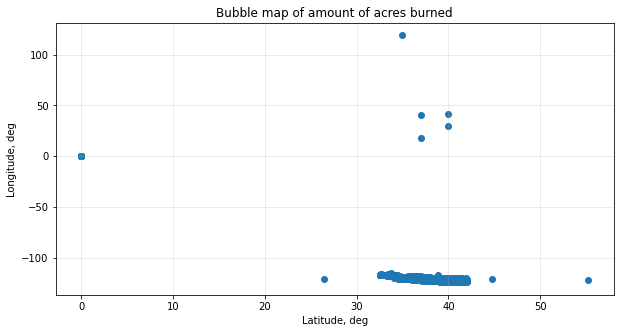

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(clean_data_1.Latitude, clean_data_1.Longitude)
# plt.colorbar()
plt.ylabel("Longitude, deg")
plt.xlabel("Latitude, deg")
plt.title("Bubble map of amount of acres burned")
plt.grid(alpha=0.3)

In [8]:
# Further, if we refer to known lat/lon ranges for california, we need to remove some of the existing
# non-California outliers
# from https://www.netstate.com/states/geography/ca_geography.html we have 
#      Longitude: 114° 8' W to 124° 24' W
#      Latitude: 32° 30' N to 42° N
clean_data_2 = clean_data_1[((clean_data_1['Latitude'] > 32) & (clean_data_1['Latitude'] < 42))]
clean_data_3 = clean_data_2[((clean_data_2['Longitude'] < -114) & (clean_data_2['Latitude'] > -124))]
print("Number of records after Latitude sorting\t" + str(clean_data_2.shape))
print("Number of records after Longitude sorting\t" + str(clean_data_3.shape))


Number of records after Latitude sorting	(1470, 40)
Number of records after Longitude sorting	(1465, 40)


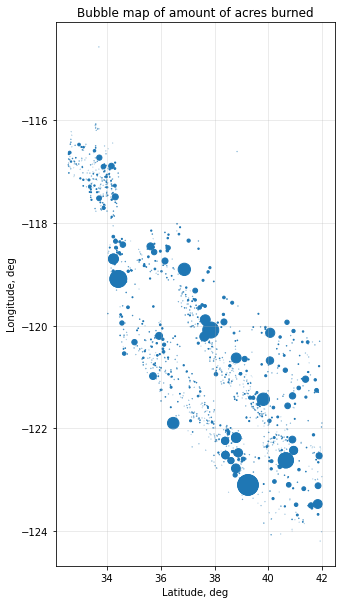

In [29]:
plt.figure(figsize=(5,10))
plt.scatter(clean_data_3.Latitude, clean_data_3.Longitude, s = clean_data_3.AcresBurned/1000)
# plt.colorbar()
plt.ylabel("Longitude, deg")
plt.xlabel("Latitude, deg")
plt.title("Bubble map of amount of acres burned")
plt.grid(alpha=0.3)

### Source California County information from Wikipedia 
This is done to access listing of all teh counties, as well as their Population and Area data

In [10]:
# Read in list of California counties from Wikipedia
raw_california_counties = pd.read_html("https://en.wikipedia.org/wiki/List_of_counties_in_California")
len(raw_california_counties)

4

In [11]:
# Separating 2nd rendered table object on the page
raw_california_counties[1]
# List all available columns
raw_california_counties[1].columns

Index(['County', 'FIPS code[5]', 'County seat[6]', 'Est.[6]', 'Formed from',
       'Etymology[7]', 'General Law or Charter[8]',
       'Population (July 2019)[9]', 'Area[6]', 'Map'],
      dtype='object')

In [12]:
# Clean California counties data
clean_california_counties_1 = raw_california_counties[1]
clean_california_counties_1.head()

,County,FIPS code[5],County seat[6],Est.[6],Formed from,Etymology[7],General Law or Charter[8],Population (July 2019)[9],Area[6],Map
0,Alameda County,1,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter,1671329,"738 sq mi(1,911 km2)",NaN
1,Alpine County,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law,1129,"739 sq mi(1,914 km2)",NaN
2,Amador County,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law,39752,"606 sq mi(1,570 km2)",NaN
3,Butte County,7,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter,219186,"1,640 sq mi(4,248 km2)",NaN
4,Calaveras County,9,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law,45905,"1,020 sq mi(2,642 km2)",NaN


In [13]:
clean_california_counties_1.columns=['County', 'FIPS', 'Seat', 'Date_Established', 'FormedFrom',
       'Etymology', 'Law','Population_Jul_2019', 'Area', 'Map']
clean_california_counties_1.head()

,County,FIPS,Seat,Date_Established,FormedFrom,Etymology,Law,Population_Jul_2019,Area,Map
0,Alameda County,1,Oakland,1853,Contra Costa and Santa Clara,"The oak and other trees, once abundant in the ...",Charter,1671329,"738 sq mi(1,911 km2)",NaN
1,Alpine County,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",Location high in the Sierra Nevada; alpine ref...,General Law,1129,"739 sq mi(1,914 km2)",NaN
2,Amador County,5,Jackson,1854,Calaveras,"Jose Maria Amador (1794–1883), a soldier, ranc...",General Law,39752,"606 sq mi(1,570 km2)",NaN
3,Butte County,7,Oroville,1850,original,"Sutter Buttes, which were mistakenly thought t...",Charter,219186,"1,640 sq mi(4,248 km2)",NaN
4,Calaveras County,9,San Andreas,1850,original,"Calaveras River; calaveras is Spanish for ""sku...",General Law,45905,"1,020 sq mi(2,642 km2)",NaN


In [14]:
clean_california_counties_2 = clean_california_counties_1[['County', 'Date_Established','Population_Jul_2019', 'Area']]
clean_california_counties_2.head()

,County,Date_Established,Population_Jul_2019,Area
0,Alameda County,1853,1671329,"738 sq mi(1,911 km2)"
1,Alpine County,1864,1129,"739 sq mi(1,914 km2)"
2,Amador County,1854,39752,"606 sq mi(1,570 km2)"
3,Butte County,1850,219186,"1,640 sq mi(4,248 km2)"
4,Calaveras County,1850,45905,"1,020 sq mi(2,642 km2)"


In [15]:
# Remove string "County" from the column "County"
clean_california_counties_2.County = clean_california_counties_2.County.str.replace(" County", "")
clean_california_counties_2.head()

C:\Users\troub\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,County,Date_Established,Population_Jul_2019,Area
0,Alameda,1853,1671329,"738 sq mi(1,911 km2)"
1,Alpine,1864,1129,"739 sq mi(1,914 km2)"
2,Amador,1854,39752,"606 sq mi(1,570 km2)"
3,Butte,1850,219186,"1,640 sq mi(4,248 km2)"
4,Calaveras,1850,45905,"1,020 sq mi(2,642 km2)"


In [16]:
# split area column into two for diferent units
clean_california_counties_2[["AreaSqMi", "AreaKm2"]] = clean_california_counties_2.Area.str.split("(",expand=True)
print(clean_california_counties_2.columns)
#       Drop old Area column
clean_california_counties_2 = clean_california_counties_2.drop(["Area"], axis=1)
clean_california_counties_2.head()

Index(['County', 'Date_Established', 'Population_Jul_2019', 'Area', 'AreaSqMi',
       'AreaKm2'],
      dtype='object')


C:\Users\troub\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
0,Alameda,1853,1671329,738 sq mi,"1,911 km2)"
1,Alpine,1864,1129,739 sq mi,"1,914 km2)"
2,Amador,1854,39752,606 sq mi,"1,570 km2)"
3,Butte,1850,219186,"1,640 sq mi","4,248 km2)"
4,Calaveras,1850,45905,"1,020 sq mi","2,642 km2)"


In [17]:
# Find which special characters are used for spaces in column header 
clean_california_counties_2.iloc[0,3]
clean_california_counties_2.iloc[0,4]

'1,911\xa0km2)'

In [18]:
# Remove unit references from data including using special '\xa0' combination for blank spaces
clean_california_counties_2.AreaSqMi = (clean_california_counties_2.AreaSqMi.str.replace("\xa0sq\xa0mi","",regex=False).str.replace(",","",regex=False)).astype('int64')
clean_california_counties_2.AreaKm2  = (clean_california_counties_2.AreaKm2.str.replace("\xa0km2)","", regex=False).str.replace(",","",regex=False)).astype('int64')
clean_california_counties_2.head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
0,Alameda,1853,1671329,738,1911
1,Alpine,1864,1129,739,1914
2,Amador,1854,39752,606,1570
3,Butte,1850,219186,1640,4248
4,Calaveras,1850,45905,1020,2642


In [19]:
clean_california_counties_2.describe(include='all')

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
count,58,58.000000,5.800000e+01,58.000000,58.000000
unique,58,NaN,NaN,NaN,NaN
top,San Diego,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1858.224138,6.812452e+05,2692.189655,6972.724138
std,NaN,13.972458,1.467932e+06,3102.397089,8035.121416
min,NaN,1850.000000,1.129000e+03,47.000000,122.000000
25%,NaN,1850.000000,4.804825e+04,960.000000,2486.250000
50%,NaN,1851.500000,1.870290e+05,1535.500000,3977.000000
75%,NaN,1860.000000,7.092760e+05,3462.250000,8967.000000


In [20]:
# Sort DF by population in descending order to view to 5 most populated counties
clean_california_counties_2.sort_values(['Population_Jul_2019'], ascending=False).head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2
18,Los Angeles,1850,10039107,4060,10515
36,San Diego,1850,3338330,4204,10888
29,Orange,1889,3175692,948,2455
32,Riverside,1893,2470546,7208,18669
35,San Bernardino,1853,2180085,20062,51960


In [21]:
# Calculate population density per square mile 
clean_california_counties_2['PopDensityPerSqMi'] = clean_california_counties_2['Population_Jul_2019']
clean_california_counties_2['PopDensityPerSqMi'] = clean_california_counties_2.Population_Jul_2019/clean_california_counties_2.AreaSqMi

# Sort DF by population density in descending order to view to 5 most densly populated counties
clean_california_counties_2.sort_values(['PopDensityPerSqMi'], ascending=False).head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2,PopDensityPerSqMi
37,San Francisco,1850,881549,47,122,18756.361702
29,Orange,1889,3175692,948,2455,3349.886076
18,Los Angeles,1850,10039107,4060,10515,2472.686453
0,Alameda,1853,1671329,738,1911,2264.673442
40,San Mateo,1856,766573,449,1163,1707.289532


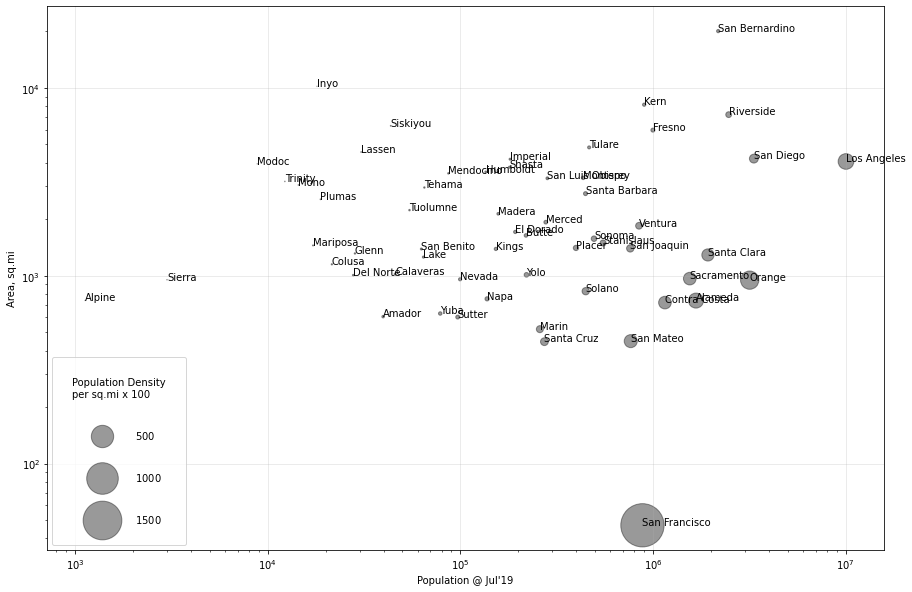

In [22]:
x = clean_california_counties_2.Population_Jul_2019
y = clean_california_counties_2.AreaSqMi
z = clean_california_counties_2.County
size = clean_california_counties_2.PopDensityPerSqMi/10

plt.figure(figsize=(15,10))
scatter = plt.scatter(x, y, s=size, alpha=0.4, c = "black")
# produce a legend with a cross section of sizes from the scatter

plt.xlabel("Population @ Jul'19")
plt.ylabel("Area, sq.mi")
plt.grid(alpha=0.3)
plt.xscale("log")
plt.yscale("log")
    
handles, labels = scatter.legend_elements("sizes", num=4)
legend = plt.legend(handles, labels, 
           loc = "lower left", 
           title = "Population Density\nper sq.mi x 100", 
           labelspacing = 3,
           handlelength=5,
           borderpad = 2)

for handle in legend.legendHandles:
    handle.set_color('blue')
    
for i, txt in enumerate(z):
    plt.annotate(txt, (x[i], y[i]))


In [23]:
# data from https://www.counties.org/data-and-research, 
# https://www.counties.org/sites/main/files/file-attachments/datapile_-_headline_datasets_-_current.xlsx

raw_california_coucus = pd.read_excel("./data/datapile_-_headline_datasets_-_current.xlsx", sheet_name="County & Government")
clean_california_caucus = raw_california_coucus[['County','Caucus']]
clean_california_caucus.head()

,County,Caucus
0,Alameda,Urban
1,Alpine,Rural
2,Amador,Rural
3,Butte,Suburban
4,Calaveras,Rural


In [24]:
# MErge counties data with caucus
clean_california_counties_merged = pd.merge(clean_california_counties_2, clean_california_caucus, on='County')
clean_california_counties_merged.head()

,County,Date_Established,Population_Jul_2019,AreaSqMi,AreaKm2,PopDensityPerSqMi,Caucus
0,Alameda,1853,1671329,738,1911,2264.673442,Urban
1,Alpine,1864,1129,739,1914,1.527740,Rural
2,Amador,1854,39752,606,1570,65.597360,Rural
3,Butte,1850,219186,1640,4248,133.650000,Suburban
4,Calaveras,1850,45905,1020,2642,45.004902,Rural


In [25]:
clean_california_counties_merged.Caucus.unique()

array(['Urban', 'Rural', 'Suburban'], dtype=object)

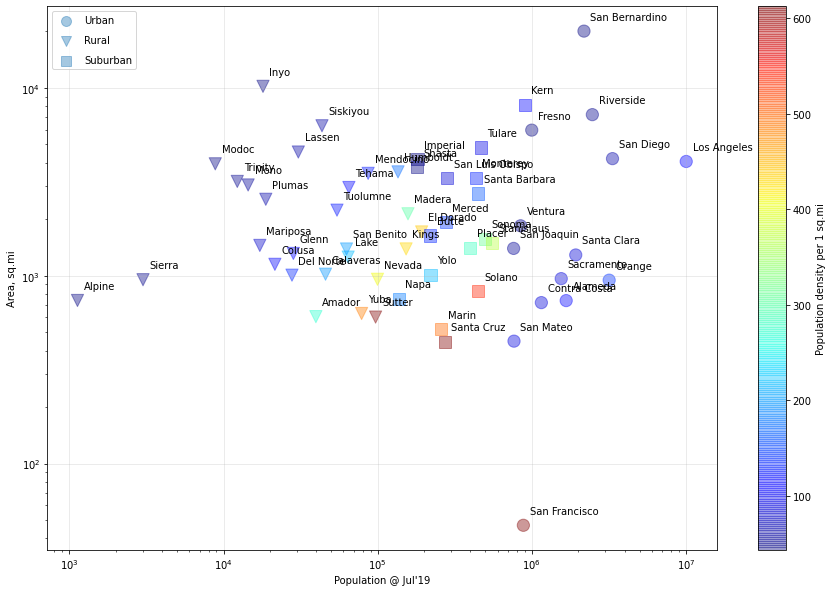

In [26]:
# Prep data for plotting input
x = clean_california_counties_2.Population_Jul_2019
y = clean_california_counties_2.AreaSqMi
counties = clean_california_counties_2.County

# Define variety of markers to be used 
shape = ["o", "v", "s"]

# Setup figure
plt.figure(figsize=(15,10))

i=0
# Run through each county type
for item in clean_california_counties_merged.Caucus.unique():
    # Extract data for specific county type     
    data = clean_california_counties_merged[clean_california_counties_merged['Caucus'] == item]
    
    # redefine subsets for coordinates     
    x_sub = data.Population_Jul_2019
    y_sub = data.AreaSqMi
    counties_sub = data.County
    
    plt.scatter(x_sub, y_sub, 
        s = 150,
        c = data.PopDensityPerSqMi,
        cmap = 'jet',
        marker = shape[i],
        alpha = 0.4, 
        label = item 
        )
    i+=1
# Set up, label and view colorbar
cbar = plt.colorbar()
cbar.set_label('Population density per 1 sq.mi')

#  Set up X, Y axes labels    
plt.xlabel("Population @ Jul'19")
plt.ylabel("Area, sq.mi")

#  Set up legend
legend = plt.legend(loc="upper left", fontsize=10, labelspacing=1)

# change the marker size manually to amke the same
for handle in legend.legendHandles:
    handle.set_sizes([100.0])

# view grid and set transparency to 30%
plt.grid(alpha=0.3)

# Change both x and y scales to logarithmic
plt.xscale("log")
plt.yscale("log")



for i, txt in enumerate(counties):
    plt.annotate(txt, (x[i]*1.1, y[i]*1.15), fontsize = 10)